<a href="https://colab.research.google.com/github/prashanthi-ch/LendingClubCaseStudy/blob/main/prashanthi_chapala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) for Lending Club
## 1. Data Sourcing
    * Importing python libraries
    * Reading the loan dataset into loan dataframe
    * printing the information and statistics

## 2. Data Cleaning
    * Checking and droping null values(missing values)
    * Imputing all missing value columns according to datatype
    * Checking outlier using boxplot 
    * Removing outliers with Interquartile range

## 3. Data Derived Metics
    * Data Processing
    * Data Filtering
    * Droping irrelevant columns
    * Converting (object) columns into numeric

## 4. Univariate Analysis
    * Continuous Variable
    * Categorical Variable
    * Ploting word cloud and Live Frame ploting
    
## 5. Segmented Univariate Analysis
    * Continuous Variable
    * Categorical Variable

## 6. Bivariate Analysis
    * Continuous Variable
    * Categorical Variable

## 7. Multivariate Analysis
    * Correlation Matrics using heatmap

## 1. Data Sourcing

* Importing libraries

In [1]:
import cv2
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Image
import datetime
import plotly.express as px

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive

from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
# Reading and loading the loan.csv file
loan_df = pd.read_csv('/content/gdrive/MyDrive/loan.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN



### Data understanding

In [5]:
# Size of dataset
loan_df.shape

(39717, 111)

In [6]:
# statistics of dataset
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## 2. Data Cleaning

#### Checking how many columns contains null values

* 54 out of 111 columns contains all null values. So its better approach to remove all null columns(features)

In [18]:
loan_df.dropna(how='all', axis=1, inplace=True)  # ‘all’ : If all values are NA, drop that column.

In [19]:
loan_df.dropna(how='all', axis = 0, inplace=True) # ‘all’ : If all values are NA, drop that rows.

In [20]:
loan_df.shape

(39717, 54)

#### Dealing with missing(NAN) values

In [21]:
# if colums contains more than 40 % null valyes, then removing those columns
drop_col = loan_df.columns[loan_df.isna().sum() > loan_df.shape[0] * .40].tolist()

In [22]:
loan_df.drop(columns=drop_col, inplace=True)

In [23]:
# This columns contains missing values
loan_df.columns[loan_df.isna().any()].tolist()

['last_pymnt_d', 'last_credit_pull_d']

#### Imputing all missing value columns accoring to there datatype

In [24]:
loan_df['emp_title'].fillna(loan_df['emp_title'].mode()[0], inplace = True)

loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace = True)

loan_df['desc'].fillna(loan_df['desc'].mode()[0], inplace = True)

loan_df['title'].fillna(loan_df['title'].mode()[0], inplace = True)

loan_df['revol_util'].fillna(loan_df['revol_util'].mode()[0], inplace = True)

loan_df['collections_12_mths_ex_med'].fillna(0.0, inplace = True)

loan_df['chargeoff_within_12_mths'].fillna(0.0, inplace = True)

loan_df['pub_rec_bankruptcies'].fillna(0.0, inplace = True)

loan_df['tax_liens'].fillna(0.0, inplace = True)

#### Checking outlier in dataset and remove if posible

* Plotting the outliers 

In [25]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import plotly.express
plotly.__version__

'5.5.0'

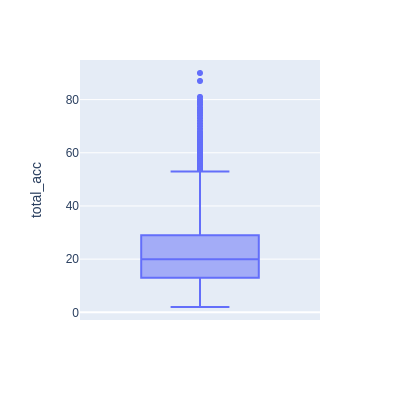

In [29]:
fig = px.box(loan_df, y="total_acc")
fig.update_layout(autosize=False, width=400, height=400)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

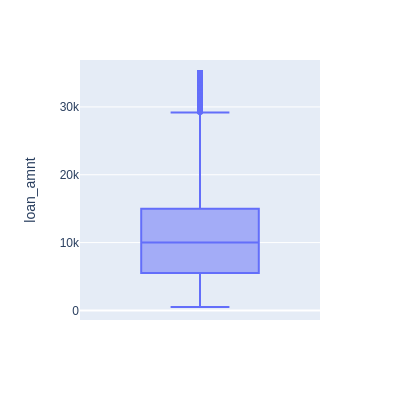

In [31]:
fig = px.box(loan_df, y="loan_amnt")
fig.update_layout(autosize=False, width=400, height=400)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

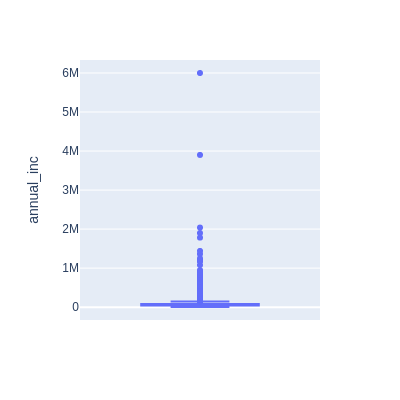

In [32]:
fig = px.box(loan_df, y="annual_inc")
fig.update_layout(autosize=False, width=400, height=400)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

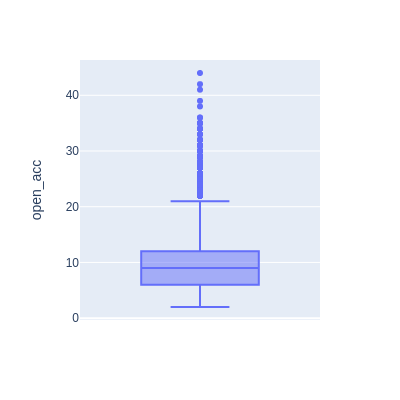

In [34]:
fig = px.box(loan_df, y="open_acc")
fig.update_layout(autosize=False, width=400, height=400)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

* Removing the outliers

In [35]:
annual_inc_q = loan_df["annual_inc"].quantile(0.99)
loan_df = loan_df[loan_df["annual_inc"] < annual_inc_q]

open_acc_q = loan_df["open_acc"].quantile(0.99)
loan_df = loan_df[loan_df["open_acc"] < open_acc_q]

pub_rec_q = loan_df["pub_rec"].quantile(0.995)
loan_df = loan_df[loan_df["pub_rec"] <= pub_rec_q]

total_acc_q = loan_df["total_acc"].quantile(0.98)
loan_df = loan_df[loan_df["total_acc"] < total_acc_q]

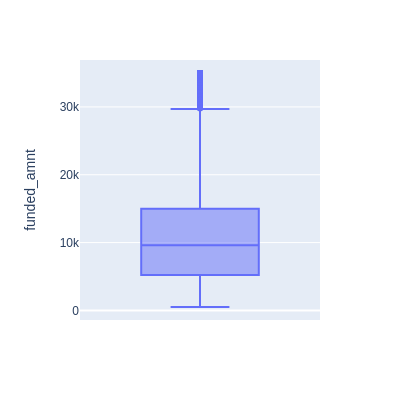

In [36]:
fig = px.box(loan_df, y="funded_amnt")
fig.update_layout(autosize=False, width=400, height=400)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

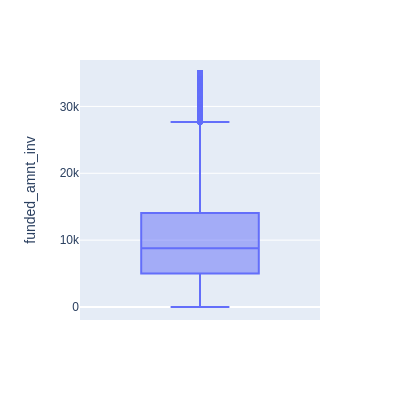

In [37]:
fig = px.box(loan_df, y="funded_amnt_inv")
fig.update_layout(autosize=False, width=400, height=400)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

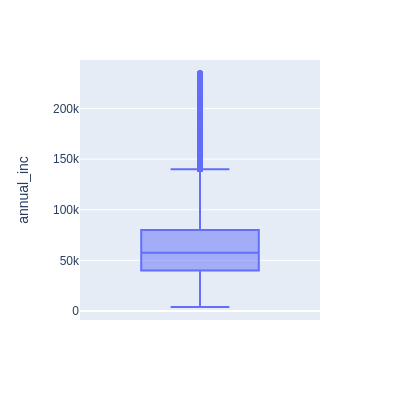

In [38]:
fig = px.box(loan_df, y="annual_inc")
fig.update_layout(autosize=False, width=400, height=400)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

## 3. Data Derived Metrics

#### Data processing, Filtering, Droping irrelevant columns and converting string(object) columns in numeric


In [39]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.796200e+04,3.796200e+04,37962.000000,37962.000000,37962.000000,37962.000000,37962.000000,37962.000000,37962.000000,37962.000000,...,37962.000000,37962.000000,37962.000000,37962.0,37962.0,37962.0,37962.0,37962.0,37962.000000,37962.0
mean,6.836565e+05,8.511264e+05,11062.050208,10797.439545,10262.686118,319.867555,64746.954488,13.281560,0.143512,0.854433,...,94.149903,12.206755,2610.228605,0.0,1.0,0.0,0.0,0.0,0.043148,0.0
std,2.107724e+05,2.657456e+05,7339.683897,7076.174663,7019.075006,204.919810,34765.289461,6.666452,0.484695,1.059784,...,680.131688,146.763491,4349.051927,0.0,0.0,0.0,0.0,0.0,0.203194,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.167412e+05,6.673595e+05,5356.250000,5200.000000,5000.000000,165.640000,40000.000000,8.150000,0.000000,0.000000,...,0.000000,0.000000,216.012500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.662055e+05,8.515320e+05,9800.000000,9600.000000,8800.000000,276.965000,57582.000000,13.370000,0.000000,1.000000,...,0.000000,0.000000,530.820000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.381738e+05,1.047677e+06,15000.000000,15000.000000,14075.000000,422.420000,80000.000000,18.547500,0.000000,1.000000,...,0.000000,0.000000,3196.797500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,234996.000000,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,1.000000,0.0


In [60]:
# Removing the current customers from dataset
loan_df = loan_df[loan_df["loan_status"].apply(lambda x:False if x == "Current" else True)]
loan_df["loan_status"].head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
5     Fully Paid
Name: loan_status, dtype: object

In [95]:
# Converting interest rate percentage into float ratio
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%').astype('float') / 100.0

In [61]:
# Removing "<" and "+" symbols from emp_lenghts
loan_df["emp_lengths"] = pd.to_numeric(loan_df["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [62]:
loan_df["emp_lengths"].head()

0    10
1     0
2    10
3    10
5     3
Name: emp_lengths, dtype: int64

In [64]:
# Converting string values in numeric format
loan_df["term"] = pd.to_numeric(loan_df["term"].apply(lambda x:x.split()[0]))

In [65]:
def process_year(date) :
    temp = date.split('-')[1]
    if len(temp) == 2 :
        temp = "20"+temp
    else :
        temp = "200"+temp
        
    return temp  

In [66]:
# Derive Month and Year from Issue Date
loan_df['issue_month']  = loan_df['issue_d'].apply(lambda date:date.split('-')[0])
loan_df['issue_month']  = loan_df['issue_month'].apply(lambda date: datetime.datetime.strptime(date, "%b").month)

loan_df['issue_year'] = loan_df['issue_d'].apply(process_year)
loan_df[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,12,2011
1,Dec-11,12,2011
2,Dec-11,12,2011
3,Dec-11,12,2011
5,Dec-11,12,2011


* Binning the variable into 5 categories in ascending order

In [48]:
# Calculating the monthly income wrt monthly EMI
loan_df['monthly_emi_ratio'] = (loan_df['annual_inc'] / 12) / loan_df['installment']
loan_df[['monthly_emi_ratio','installment','annual_inc']].head()

,monthly_emi_ratio,installment,annual_inc
0,12.279732,162.87,24000.0
1,41.785058,59.83,30000.0
2,12.107198,84.33,12252.0
3,12.083346,339.31,49200.0
5,19.174230,156.46,36000.0


In [67]:
# Calculating the ratio of annual_inc wrt of funded_amnt
loan_df['loan_amt_inc_ratio'] = loan_df['loan_amnt'] / loan_df['annual_inc']
loan_df[['loan_amt_inc_ratio','loan_amnt','annual_inc']].head()

,loan_amt_inc_ratio,loan_amnt,annual_inc
0,0.208333,5000,24000.0
1,0.083333,2500,30000.0
2,0.195886,2400,12252.0
3,0.203252,10000,49200.0
5,0.138889,5000,36000.0


In [69]:
loan_df["funded_amt_inc_ratio_bin"] = pd.cut(loan_df['loan_amt_inc_ratio'], 4, labels=['Low', 'Medium', 'High', 'Very_high'])

In [96]:
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], 5, labels=['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+'])

In [73]:
loan_df['annual_inc_range'] = pd.cut(loan_df['annual_inc'], 5, labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+'])
loan_df['annual_inc_range'].head()

0    0-25000
1    0-25000
2    0-25000
3    0-25000
5    0-25000
Name: annual_inc_range, dtype: category
Categories (5, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000-100000' < '100000+']

## 4. Univariate Analysis

* Categorical Features

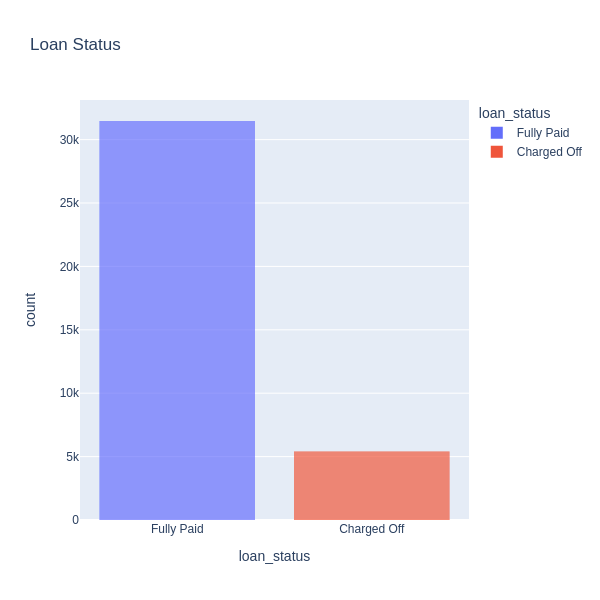

In [74]:
fig = px.bar(loan_df, x="loan_status", color='loan_status', title="Loan Status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph loan_status shows class is biased by Fully Paid which is good for Lending Clud. Fully Paid has 30k+ and Charged Off has 5K+ entries

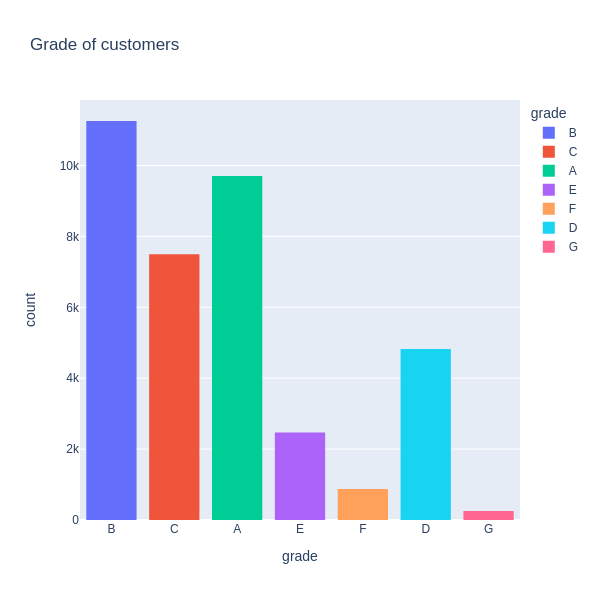

In [75]:
fig = px.histogram(loan_df, x="grade", color="grade", title="Grade of customers")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows 'B' grade customers have taken Loan Compare to 'A' Grade Customers. 'G' grade customers has low count. 

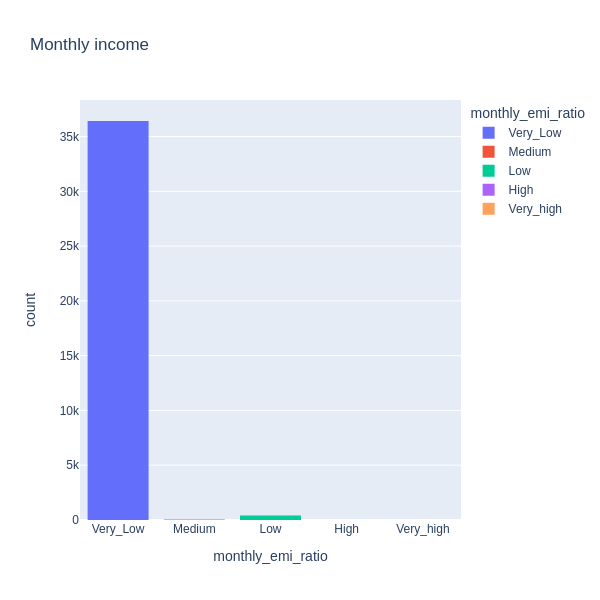

In [76]:
fig = px.histogram(loan_df, x="monthly_emi_ratio", color="monthly_emi_ratio", title="Monthly income")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graphs shows the ratio of monthly income w.r.t monthly installments. According to Very_Low most of the customers paying monthly emi less than 30% of monthly salary. About 60 customers paying emi morethan 50% of monthly salary.

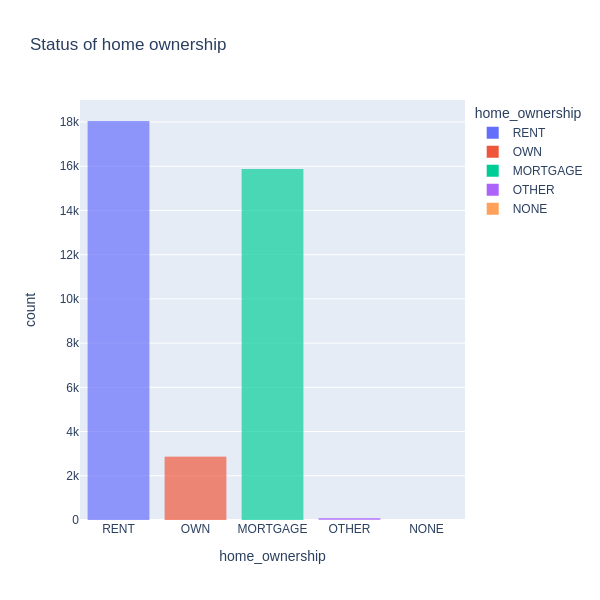

In [77]:
fig = px.bar(loan_df, x="home_ownership", color= "home_ownership",  title="Status of home ownership")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows the customers who is staying on rent taken more loans compare to the customers who has own house.

* Continuous Features

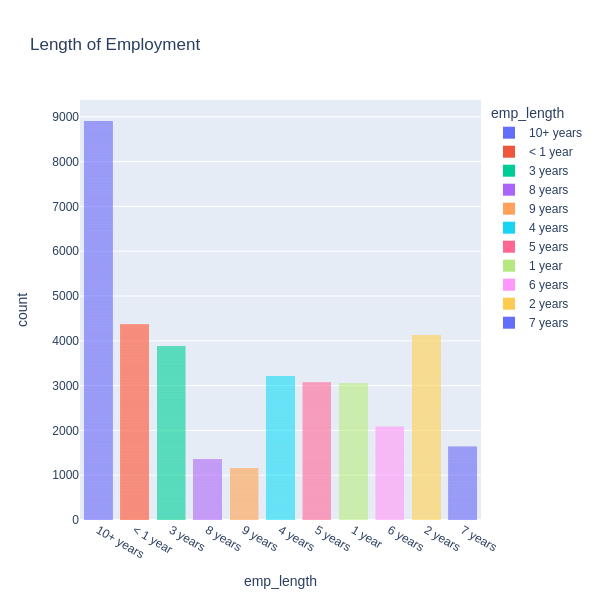

In [78]:
fig = px.bar(loan_df, x="emp_length",color= "emp_length",  title="Length of Employment")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows employees who stays more than 10 years and less than one year taken more loan

## 5. Segmented Univariate Analysis

* Categorical Features


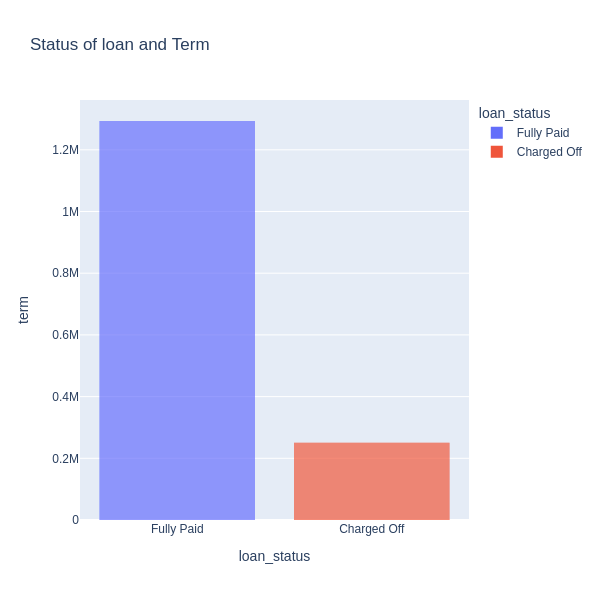

In [84]:
fig = px.bar(loan_df, x="loan_status", y="term", color="loan_status", title="Status of loan and Term")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

Above graph shows 'term' refer the defaulter rate is increasing with respect to the term, hence the chances of loan getting defaulted is less than 36months

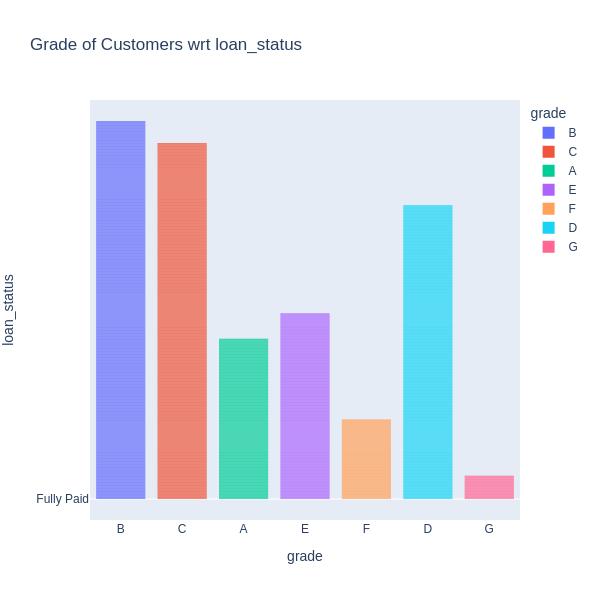

In [85]:
fig = px.bar(loan_df, x="grade", y="loan_status", color="grade", title="Grade of Customers wrt loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘grade’ we can infer that the defaulters rate is increasing wrt grade, hence the chances of loan getting defaulted increases with the grade from A moving towards G.

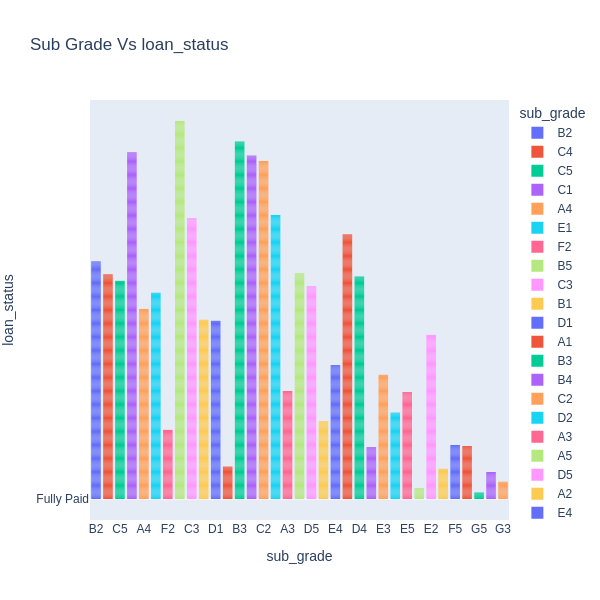

In [86]:
fig = px.bar(loan_df, x="sub_grade", y="loan_status", color= "sub_grade",  title="Sub Grade Vs loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From the above plot for 'sub grade', we can infer that the defaulters rate is increasing with respect to the subgrade

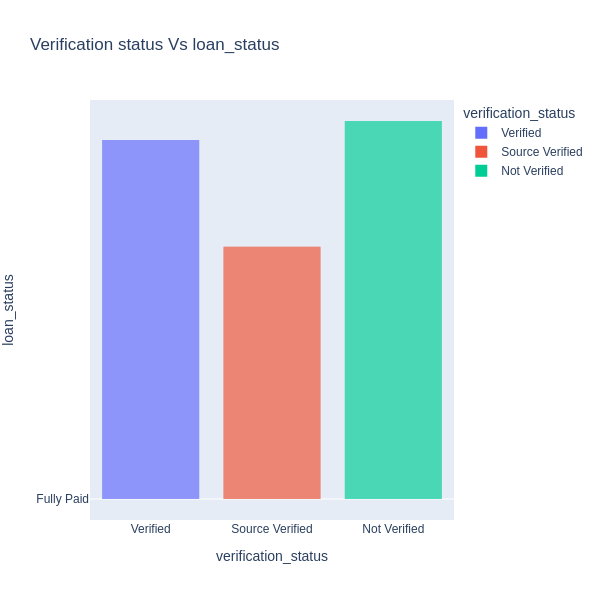

In [87]:
fig = px.bar(loan_df, x="verification_status", y="loan_status", color= "verification_status",  title="Verification status Vs loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

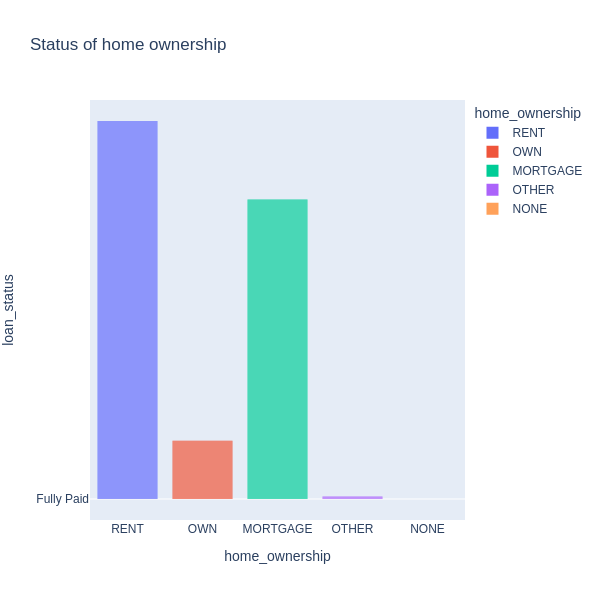

In [88]:
fig = px.bar(loan_df, x="home_ownership", y="loan_status", color= "home_ownership",  title="Status of home ownership")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

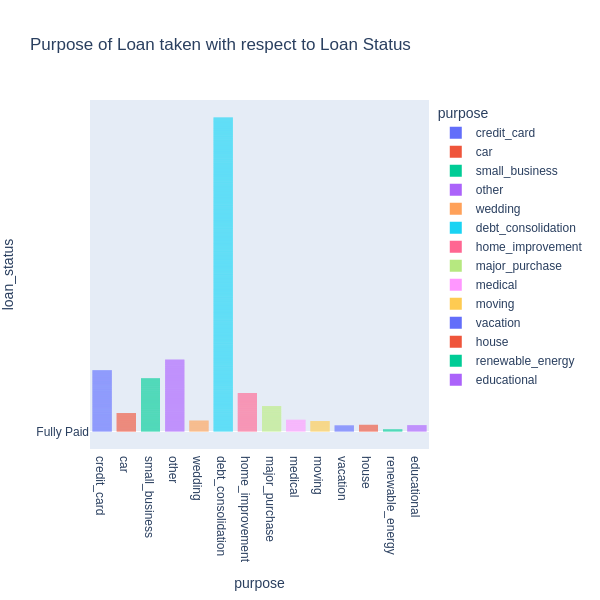

In [89]:
fig = px.bar(loan_df, x="purpose", y="loan_status", color= "purpose",  title="Purpose of Loan taken with respect to Loan Status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From the above plot 'purpose' we can infer that default rate is nearly constant for all purpose.Hence default rate depends on the purpose of loan

* Continuous Features

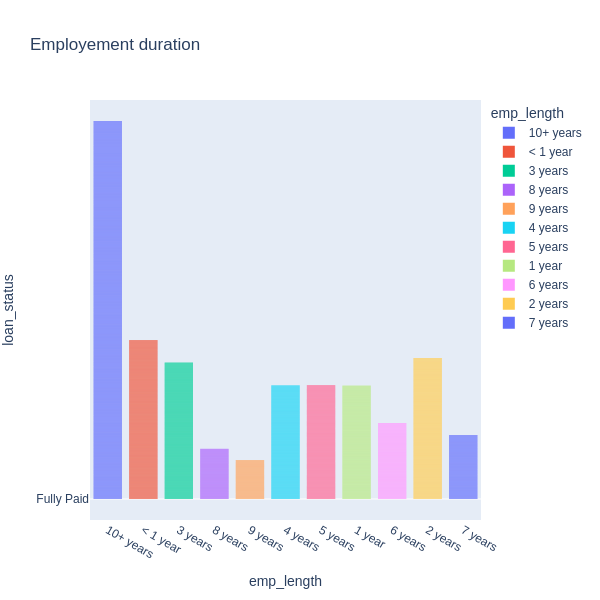

In [90]:
fig = px.bar(loan_df, x="emp_length", y="loan_status", color= "emp_length",  title="Employement duration")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

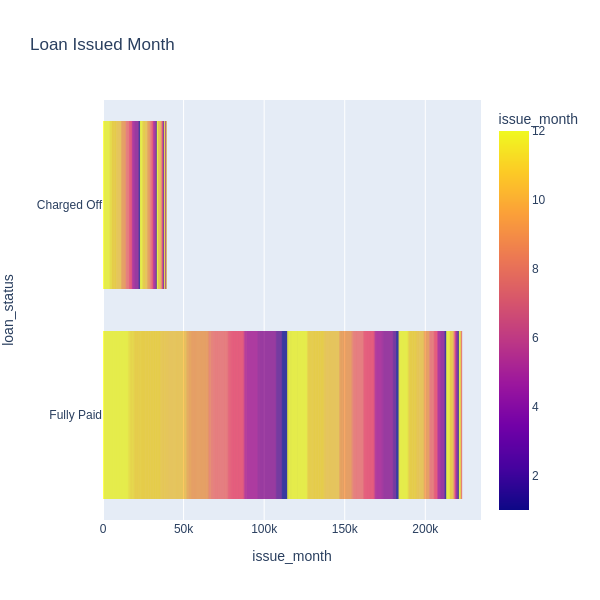

In [91]:
fig = px.bar(loan_df, x="issue_month", y="loan_status", color= "issue_month",  title="Loan Issued Month")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

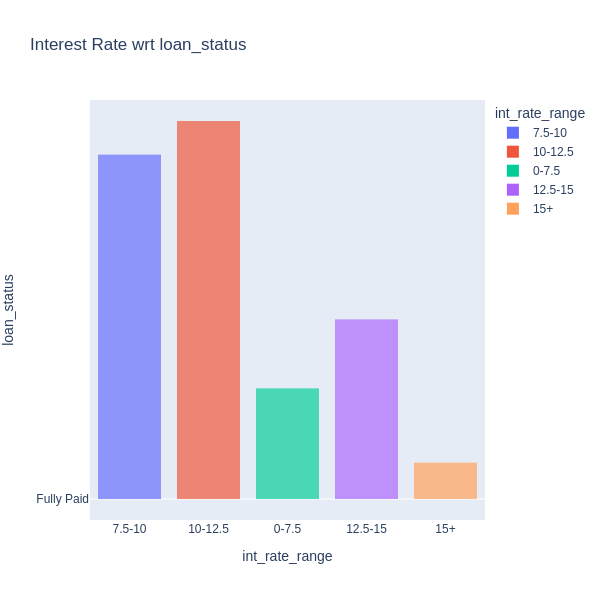

In [97]:
fig = px.bar(loan_df, x="int_rate_range", y="loan_status", color= "int_rate_range",  title="Interest Rate range wrt loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for ‘int_rate_range’ we can infer that the defaulters rate is decreasing with int_rate_range values, hence rate will depend on int_rate_range feature

## 6. Bivariate Analysis

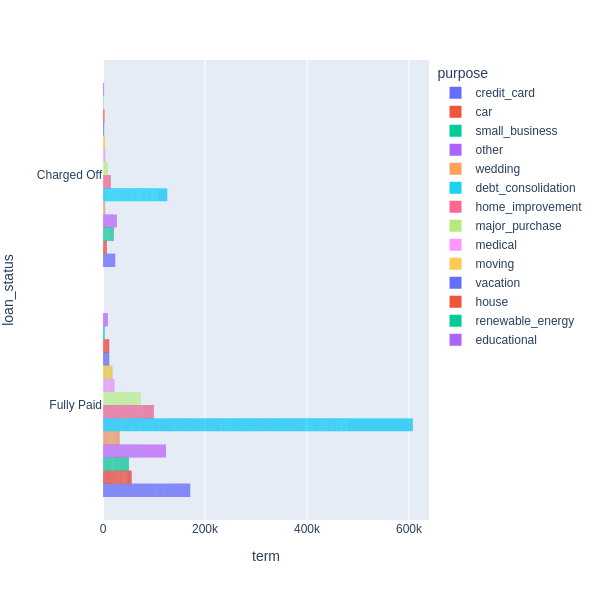

In [98]:
fig = px.bar(loan_df, x="term", y="loan_status", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt term

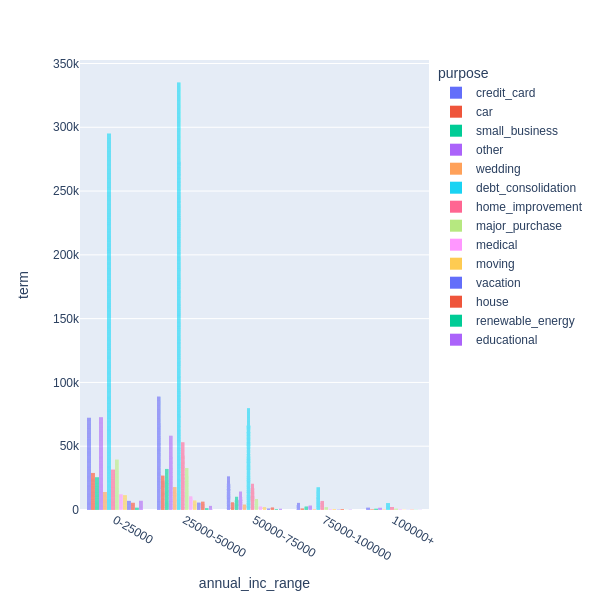

In [99]:
fig = px.bar(loan_df, x="annual_inc_range", y="term", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

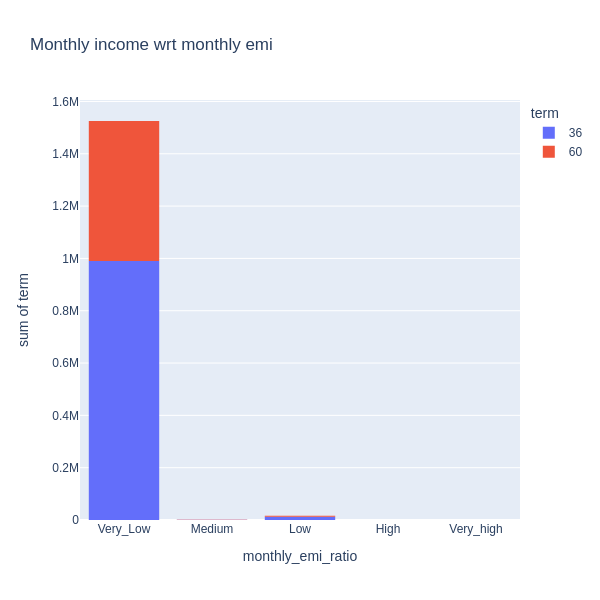

In [ ]:
fig = px.histogram(loan_df, x="monthly_emi_ratio", y ='term', color='term', title="Monthly income wrt monthly emi")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

From above plot for `monthly_emi_ratio` we can infer that the defaulters rate is increasing wrt `term`.


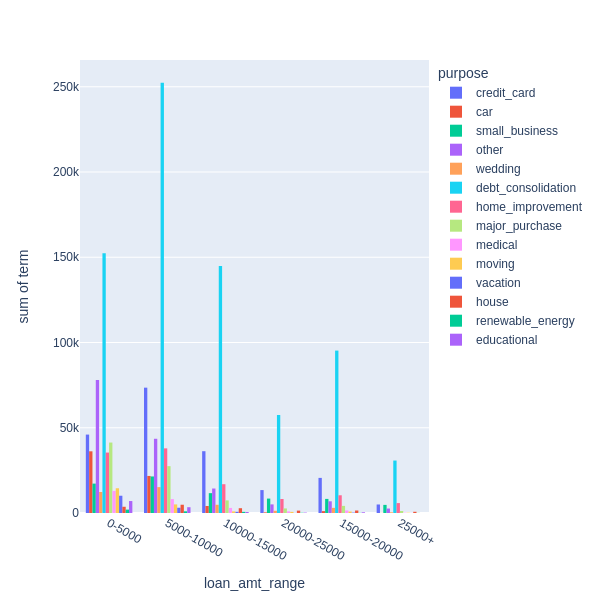

In [ ]:
fig = px.histogram(loan_df, x="loan_amt_range", y="term", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt_range


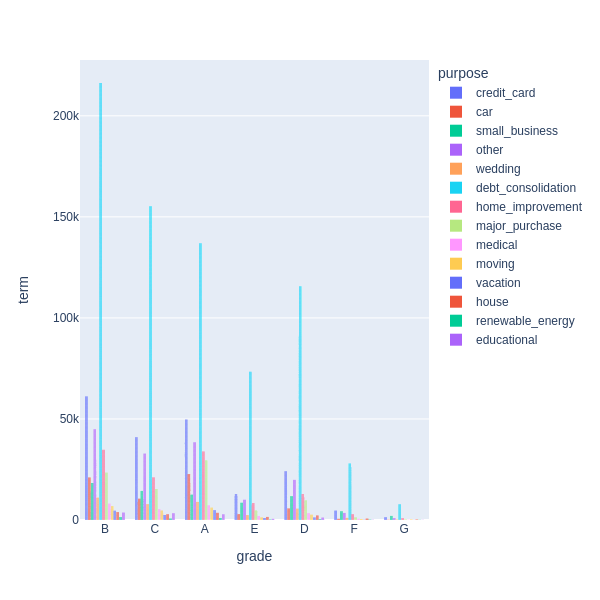

In [ ]:
fig = px.bar(loan_df, x="grade", y="term", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt grade

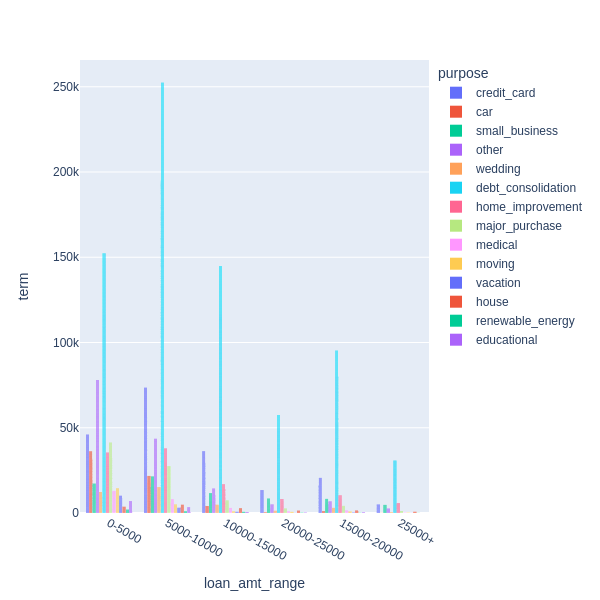

In [ ]:
fig = px.bar(loan_df, x="loan_amt_range", y="term", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=600, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every term wrt loan_amnt_range

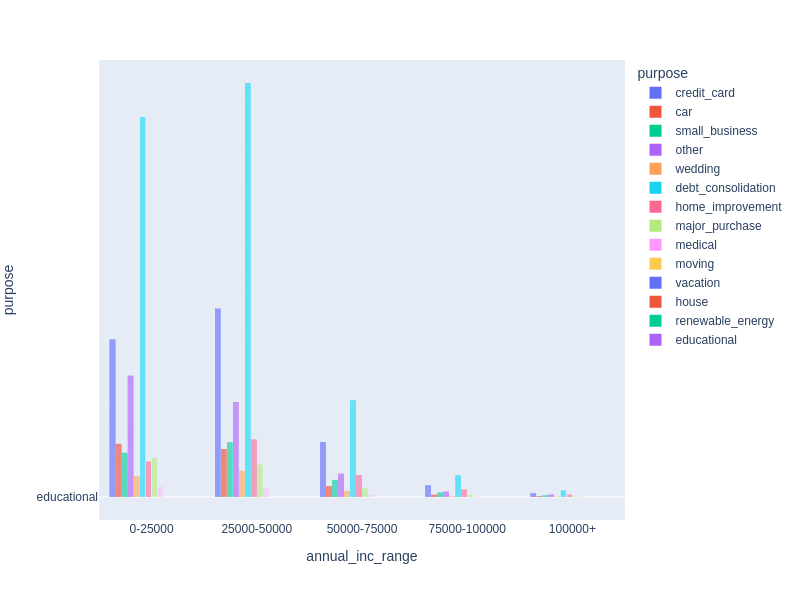

In [102]:
fig = px.bar(loan_df, x="annual_inc_range", y="purpose", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=800, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt annual_inc_range

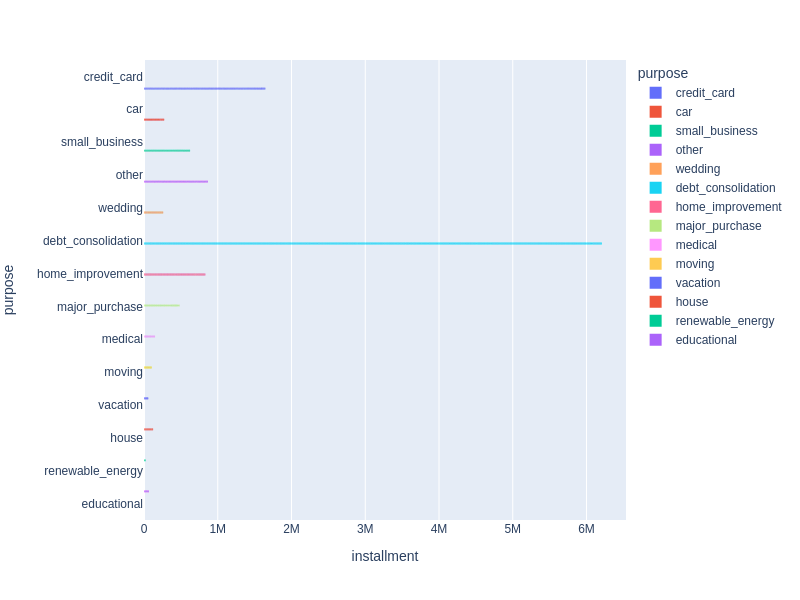

In [ ]:
fig = px.bar(loan_df, x="installment", y="purpose", color="purpose",
             barmode="group")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=800, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt installment except for small_business

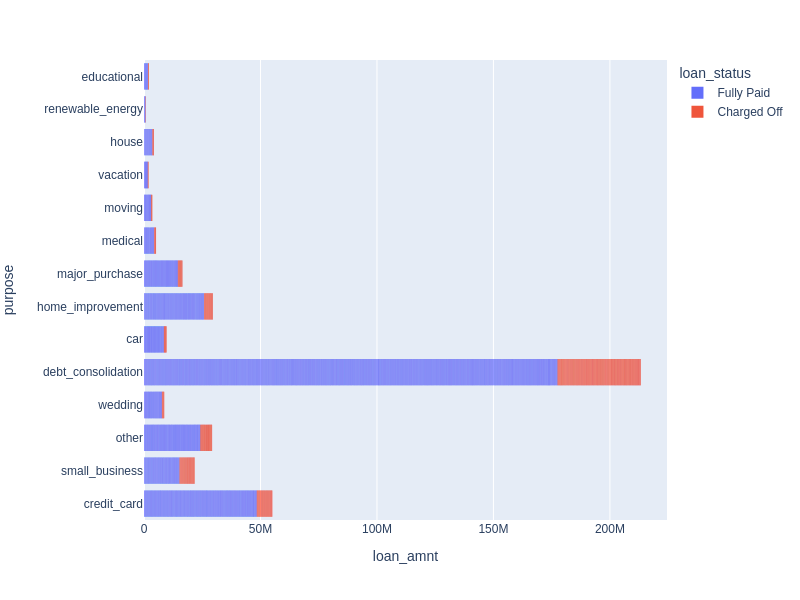

In [100]:
fig = px.bar(loan_df, x = "loan_amnt", y = "purpose", color="loan_status")
fig.update_traces(dict(marker_line_width=0))
fig.update_layout(autosize=False, width=800, height=600)
img_bytes = fig.to_image(format="png")
Image(img_bytes)

As we can see straight lines on the plot, default ratio increases for every purpose wrt loan_amnt

#### Interactive Frame visuallization

In [101]:
fig = px.scatter(loan_df, x="annual_inc", y="funded_amnt", animation_frame="issue_month",
          color="loan_status")
fig.show()

Above graph shows the scatter plot for ratio of Fully Paid and Charged off customers

Above graph shows Correlation matrics i.e linear relationship between continuous variables

## 7. Multivariate Analysis

In [109]:
loan_df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'emp_lengths', 'issue_month',
       'issue_year', 'monthly_emi_ratio', 'loan_amt_inc_ratio',
     

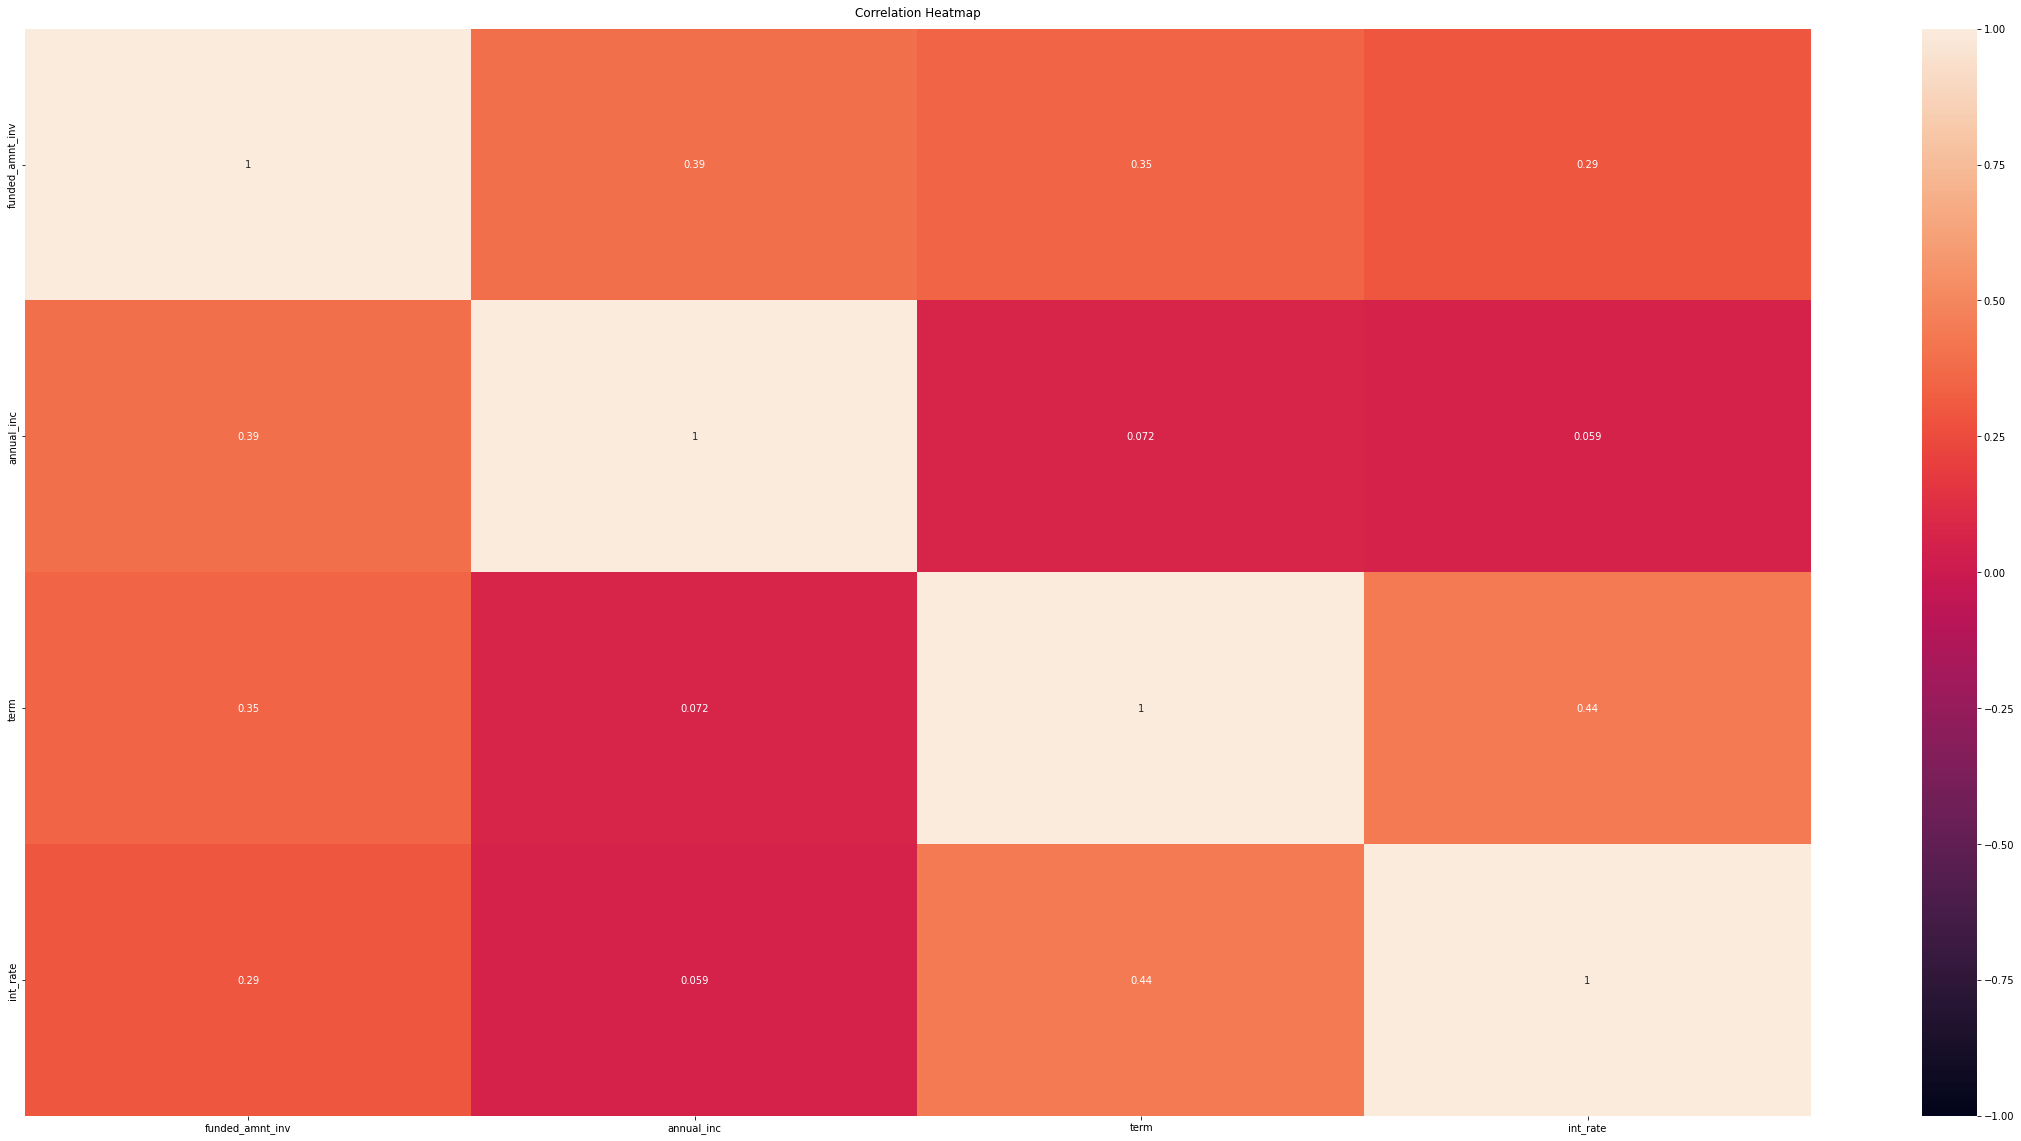

In [111]:
continuous_features = ["funded_amnt_inv", "annual_inc", "term", "int_rate"]
df_corr = loan_df[continuous_features].corr()
plt.figure(figsize=(40, 20))
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Above graph shows Correlation matrics i.e linear relationship between continuous variables